# Hyperparameters Tunning for Deep Learning Models (full of errors)
TODO add description

In [1]:
import optuna 
import sys; sys.path.append('..')
from thesis_package import utils, aimodels as myai, metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
num_trials = 50

c:\Users\jamil\Documents\IST\Thesis\new_thesis\code\AI-to-forecast-constraints-in-the-energy-systems\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Max u

## MLP: Sparse Classification Dataset

Build optuna study...

[I 2022-09-24 22:55:40,066] A new study created in memory with name: no-name-0da40026-8d7d-48a7-95d2-995b0a38a151
[I 2022-09-24 22:56:46,661] Trial 0 finished with value: 0.12798444745954923 and parameters: {'hidden_size': 15, 'n_layers': 1, 'dropout': 0.46839714372060004, 'activation': 'relu', 'optimizer': 'sgd', 'lr': 0.0005536808584519341, 'epochs': 38, 'batch_size': 2}. Best is trial 0 with value: 0.12798444745954923.


Number of finished trials:  1
Best trial:
  Value: 0.12798444745954923
  Params: 
    hidden_size: 15
    n_layers: 1
    dropout: 0.46839714372060004
    activation: relu
    optimizer: sgd
    lr: 0.0005536808584519341
    epochs: 38
    batch_size: 2


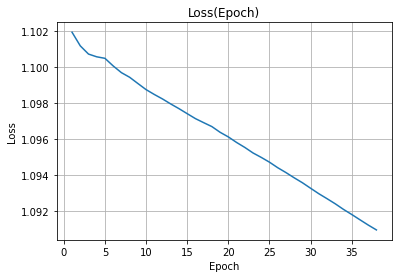

In [2]:
# Build optuna objective function.
import optuna
import sklearn 

def objective(trial):
    # Data loading
    y_max_u_bool = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_sparse_bool_constr.csv').drop(columns='timestamps') 
    exogenous_data = pd.read_csv('..\data\processed\production\exogenous_data_extended.csv').drop(columns=['date'])
    X_max_u_bool_train, X_max_u_bool_test, y_max_u_bool_train, y_max_u_bool_test, scaler = utils.split_and_suffle(exogenous_data, y_max_u_bool[utils.cols_with_positive_values(y_max_u_bool)], test_size=0.2, scaling=True)
    data = {'X_train':X_max_u_bool_train.astype(float),
            'X_test': X_max_u_bool_test.astype(float),
            'y_train':y_max_u_bool_train.astype(float),
            'y_test': y_max_u_bool_test.astype(float)
        }
    # Dataset object creation
    _dataset = myai.ThesisDataset(data)
    hyper_params = {
        'input_size': _dataset.X.shape[1],
        'hidden_size': trial.suggest_int('hidden_size', 1, 100),
        'output_size': _dataset.y.shape[1],
        'n_layers': trial.suggest_int('n_layers', 1, 3),
        'dropout': trial.suggest_float('dropout', 0.0, 0.5),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid']),
        'optimizer': trial.suggest_categorical('optimizer', ['adam', 'sgd']),
        'lr': trial.suggest_float('lr', 1e-5, 1e-1, log=True),
        'epochs': trial.suggest_int('epochs', 1, 100),
        'batch_size': trial.suggest_categorical('batch_size', [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]),
        'classifier': True
        }
    model = myai.Context(myai.MultilayerPerceptronStrategy(hyper_params))
    model.fit(data)
    prediction = model.predict(data)
    prediction = pd.DataFrame(prediction, columns=utils.cols_with_positive_values(y_max_u_bool))
    f1_score = sklearn.metrics.f1_score(data['y_test'], prediction, average='micro')
    return f1_score
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=num_trials)
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
# Write the results to a csv file.
with open("./hyper_params_results/params_mlp_sparse_classifier_max_u.csv", "w") as f:
    f.write("params,value\n")
    for key, value in trial.params.items():
        f.write("{},{}\n".format(key, value))
    f.write("classifier,True\n")
    f.write("value,{}\n".format(trial.value))

In [3]:
y_max_u_bool = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_sparse_bool_constr.csv').drop(columns='timestamps') 

In [4]:
y_max_u_bool.columns

Index(['ext_grid', 'bus_1', 'bus_2', 'bus_3', 'bus_4', 'bus_5', 'bus_6',
       'bus_7', 'bus_8', 'bus_9', 'bus_10', 'bus_11', 'bus_12', 'bus_13',
       'bus_14', 'bus_15', 'bus_16', 'bus_19', 'bus_20', 'bus_22', 'bus_25',
       'bus_26', 'bus_28', 'bus_29', 'bus_30', 'bus_31', 'bus_17', 'bus_21',
       'bus_24', 'bus_18', 'bus_23', 'bus_27', 'bus_32', 'bus_33'],
      dtype='object')

Now we confirm that the target feature is created correctly, being in accord with the sparse dataset.

## MLP: Balanced Classification Dataset

[I 2022-09-24 22:56:47,656] A new study created in memory with name: no-name-0c6bbd90-1fde-4948-9f94-330688787abe
[I 2022-09-24 22:57:10,472] Trial 0 finished with value: 0.5689144868410527 and parameters: {'hidden_size': 59, 'n_layers': 1, 'dropout': 0.47028305711793095, 'activation': 'relu', 'optimizer': 'sgd', 'lr': 0.0021625752682279224, 'epochs': 82, 'batch_size': 64}. Best is trial 0 with value: 0.5689144868410527.


Number of finished trials:  1
Best trial:
  Value: 0.5689144868410527
  Params: 
    hidden_size: 59
    n_layers: 1
    dropout: 0.47028305711793095
    activation: relu
    optimizer: sgd
    lr: 0.0021625752682279224
    epochs: 82
    batch_size: 64


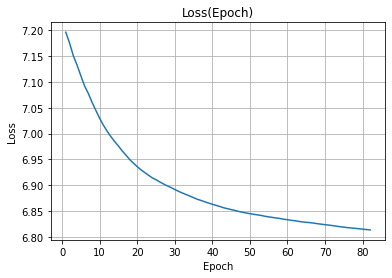

In [5]:
# Build optuna objective function.
import optuna
import sklearn 

def objective(trial):
    # Data loading
    y_max_u_bool = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_balanced_bool_constr.csv')
    exogenous_data = pd.read_csv('..\data\ground_truth\\exogenous_data_vm_pu_max_balanced.csv').drop(columns=['date'])
    X_max_u_bool_train, X_max_u_bool_test, y_max_u_bool_train, y_max_u_bool_test, scaler = utils.split_and_suffle(exogenous_data, y_max_u_bool[utils.cols_with_positive_values(y_max_u_bool)], test_size=0.2, scaling=True)
    data = {'X_train':X_max_u_bool_train.astype(float),
            'X_test': X_max_u_bool_test.astype(float),
            'y_train':y_max_u_bool_train.astype(float),
            'y_test': y_max_u_bool_test.astype(float)
        }
    # Dataset object creation
    _dataset = myai.ThesisDataset(data)
    hyper_params = {
        'input_size': _dataset.X.shape[1],
        'hidden_size': trial.suggest_int('hidden_size', 1, 100),
        'output_size': _dataset.y.shape[1],
        'n_layers': trial.suggest_int('n_layers', 1, 3),
        'dropout': trial.suggest_float('dropout', 0.0, 0.5),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid']),
        'optimizer': trial.suggest_categorical('optimizer', ['adam', 'sgd']),
        'lr': trial.suggest_float('lr', 1e-5, 1e-1, log=True),
        'epochs': trial.suggest_int('epochs', 1, 100),
        'batch_size': trial.suggest_categorical('batch_size', [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]),
        'classifier': True
        }
    model = myai.Context(myai.MultilayerPerceptronStrategy(hyper_params))
    model.fit(data)
    prediction = model.predict(data)
    prediction = pd.DataFrame(prediction, columns=utils.cols_with_positive_values(y_max_u_bool))
    f1_score = sklearn.metrics.f1_score(data['y_test'], prediction, average='micro')
    return f1_score
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=num_trials)
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
# Write the results to a csv file.
with open("./hyper_params_results/params_mlp_balanced_classifier_max_u.csv", "w") as f:
    f.write("params,value\n")
    for key, value in trial.params.items():
        f.write("{},{}\n".format(key, value))
    f.write("classifier,True\n")
    f.write("value,{}\n".format(trial.value))

## MLP: Regression Sparse Dataset

[I 2022-09-24 22:57:10,792] A new study created in memory with name: no-name-0e98e61b-158c-41ba-8b6f-59465529fc3a
[I 2022-09-24 22:58:29,923] Trial 0 finished with value: 0.9720406817219905 and parameters: {'hidden_size': 14, 'n_layers': 3, 'dropout': 0.3654600830130775, 'activation': 'sigmoid', 'optimizer': 'sgd', 'lr': 0.0016291081786125228, 'epochs': 27, 'batch_size': 32}. Best is trial 0 with value: 0.9720406817219905.


Number of finished trials:  1
Best trial:
  Value: 0.9720406817219905
  Params: 
    hidden_size: 14
    n_layers: 3
    dropout: 0.3654600830130775
    activation: sigmoid
    optimizer: sgd
    lr: 0.0016291081786125228
    epochs: 27
    batch_size: 32


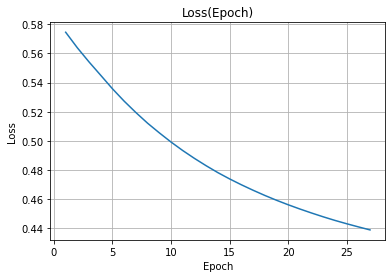

In [6]:
# Build optuna objective function.
import optuna
import sklearn 

def objective(trial):
    # Data loading
    y_max_u = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_constr.csv').drop(columns='timestamps')
    exogenous_data = pd.read_csv('..\data\processed\production\exogenous_data_extended.csv').drop(columns=['date'])
    X_max_u_train, X_max_u_test, y_max_u_train, y_max_u_test, scaler = utils.split_and_suffle(exogenous_data, y_max_u, test_size=0.2, scaling=True)
    data = {'X_train':X_max_u_train.astype(float),
            'X_test': X_max_u_test.astype(float),
            'y_train':y_max_u_train.astype(float),
            'y_test': y_max_u_test.astype(float)
        }
    # Dataset object creation
    _dataset = myai.ThesisDataset(data)
    hyper_params = {
        'input_size': _dataset.X.shape[1],
        'hidden_size': trial.suggest_int('hidden_size', 1, 100),
        'output_size': _dataset.y.shape[1],
        'n_layers': trial.suggest_int('n_layers', 1, 3),
        'dropout': trial.suggest_float('dropout', 0.0, 0.5),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid']),
        'optimizer': trial.suggest_categorical('optimizer', ['adam', 'sgd']),
        'lr': trial.suggest_float('lr', 1e-5, 1e-1, log=True),
        'epochs': trial.suggest_int('epochs', 1, 100),
        'batch_size': trial.suggest_categorical('batch_size', [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]),
        'classifier': False
        }
    model = myai.Context(myai.MultilayerPerceptronStrategy(hyper_params))
    model.fit(data)
    prediction = model.predict(data)
    prediction = pd.DataFrame(prediction, columns=y_max_u.columns)
    y_max_u_train = pd.DataFrame(y_max_u_train, columns=y_max_u.columns)
    # evaluate the regression performance with my metrics
    threshold = data['y_test'].loc[:, data['y_test'].max(axis=0) != 0].max(axis=0).mean() * 0.1 
    metric = metrics.Metrics()
    metric.get_prediction_scores(prediction, data['y_test'], threshold=threshold)
    return metric.hybrid_f1
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=num_trials)
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
# Write the results to a csv file.
with open("./hyper_params_results/params_mlp_regression_sparse_max_u.csv", "w") as f:
    f.write("params,value\n")
    for key, value in trial.params.items():
        f.write("{},{}\n".format(key, value))
    f.write("classifier,False\n")
    f.write("value,{}\n".format(trial.value))

## MLP: Regression Focused Dataset

[I 2022-09-24 22:58:30,229] A new study created in memory with name: no-name-3c306d71-0002-4198-9612-6739fcaa87cf
[I 2022-09-24 22:58:37,032] Trial 0 finished with value: 0.2110257955777539 and parameters: {'hidden_size': 21, 'n_layers': 1, 'dropout': 0.4698845697400264, 'activation': 'relu', 'optimizer': 'sgd', 'lr': 1.3082544592735434e-05, 'epochs': 55, 'batch_size': 32}. Best is trial 0 with value: 0.2110257955777539.


Number of finished trials:  1
Best trial:
  Value: 0.2110257955777539
  Params: 
    hidden_size: 21
    n_layers: 1
    dropout: 0.4698845697400264
    activation: relu
    optimizer: sgd
    lr: 1.3082544592735434e-05
    epochs: 55
    batch_size: 32


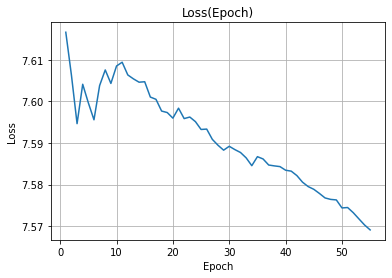

In [7]:
# Build optuna objective function.
import optuna
import sklearn 

def objective(trial):
    # Data loading
    y_max_u = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_focused_constr.csv')
    exogenous_data = pd.read_csv('..\data\ground_truth\\exogenous_data_vm_pu_max_focused.csv').drop(columns=['date'])
    X_max_u_train, X_max_u_test, y_max_u_train, y_max_u_test, scaler = utils.split_and_suffle(exogenous_data, y_max_u, scaling=True)
    data = {'X_train':X_max_u_train.astype(float),
            'X_test': X_max_u_test.astype(float),
            'y_train':y_max_u_train.astype(float),
            'y_test': y_max_u_test.astype(float)
        }
    # Dataset object creation
    _dataset = myai.ThesisDataset(data)
    hyper_params = {
        'input_size': _dataset.X.shape[1],
        'hidden_size': trial.suggest_int('hidden_size', 1, 100),
        'output_size': _dataset.y.shape[1],
        'n_layers': trial.suggest_int('n_layers', 1, 3),
        'dropout': trial.suggest_float('dropout', 0.0, 0.5),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid']),
        'optimizer': trial.suggest_categorical('optimizer', ['adam', 'sgd']),
        'lr': trial.suggest_float('lr', 1e-5, 1e-1, log=True),
        'epochs': trial.suggest_int('epochs', 1, 100),
        'batch_size': trial.suggest_categorical('batch_size', [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]),
        'classifier': False
        }
    model = myai.Context(myai.MultilayerPerceptronStrategy(hyper_params))
    model.fit(data)
    # print(model.strategy.model.eval())
    prediction = model.predict(data)
    prediction = pd.DataFrame(prediction, columns=y_max_u.columns)
    # print('bus_16 prediction: ', prediction['bus_16'])
    y_max_u_train = pd.DataFrame(y_max_u_train, columns=y_max_u.columns)
    # evaluate the regression performance with my metrics
    threshold = y_max_u_train.loc[:, y_max_u_train.max(axis=0) != 0].max(axis=0).mean() * 0.1 
    # print('threshold: ', threshold)
    metric = metrics.Metrics()
    data['y_test'] = pd.DataFrame(data['y_test'], columns=y_max_u.columns)
    # evaluate the regression performance with my metrics
    return mean_squared_error(data['y_test'], prediction, squared=False)
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=num_trials)
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
# Write the results to a csv file.
with open("./hyper_params_results/params_mlp_regression_focused_max_u.csv", "w") as f:
    f.write("params,value\n")
    for key, value in trial.params.items():
        f.write("{},{}\n".format(key, value))
    f.write("classifier,False\n")
    f.write("value,{}\n".format(trial.value))

## MLP: Regression Filtered Dataset

[I 2022-09-24 22:58:37,598] A new study created in memory with name: no-name-a9314252-422a-40f5-bd76-56f4627bdbc5
[I 2022-09-24 23:00:52,714] Trial 0 finished with value: 0.919348114758151 and parameters: {'hidden_size': 75, 'n_layers': 1, 'dropout': 0.10297209378506456, 'activation': 'sigmoid', 'optimizer': 'adam', 'lr': 0.010602706133974097, 'epochs': 45, 'batch_size': 64}. Best is trial 0 with value: 0.919348114758151.


Number of finished trials:  1
Best trial:
  Value: 0.919348114758151
  Params: 
    hidden_size: 75
    n_layers: 1
    dropout: 0.10297209378506456
    activation: sigmoid
    optimizer: adam
    lr: 0.010602706133974097
    epochs: 45
    batch_size: 64


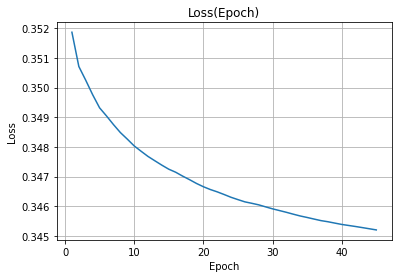

In [8]:
# Build optuna objective function.
import optuna
import sklearn 

def objective(trial):
    # Data loading
    y_max_u = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_constr.csv').drop(columns='timestamps')
    y_max_u = y_max_u[utils.cols_with_positive_values(y_max_u)]
    exogenous_data = pd.read_csv('..\data\processed\production\exogenous_data_extended.csv').drop(columns=['date'])
    X_max_u_train, X_max_u_test, y_max_u_train, y_max_u_test, scaler = utils.split_and_suffle(exogenous_data, y_max_u, test_size=0.2, scaling=True)
    data = {'X_train':X_max_u_train.astype(float),
            'X_test': X_max_u_test.astype(float),
            'y_train':y_max_u_train.astype(float),
            'y_test': y_max_u_test.astype(float)
        }
    # Dataset object creation
    _dataset = myai.ThesisDataset(data)
    hyper_params = {
        'input_size': _dataset.X.shape[1],
        'hidden_size': trial.suggest_int('hidden_size', 1, 100),
        'output_size': _dataset.y.shape[1],
        'n_layers': trial.suggest_int('n_layers', 1, 3),
        'dropout': trial.suggest_float('dropout', 0.0, 0.5),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid']),
        'optimizer': trial.suggest_categorical('optimizer', ['adam', 'sgd']),
        'lr': trial.suggest_float('lr', 1e-5, 1e-1, log=True),
        'epochs': trial.suggest_int('epochs', 1, 100),
        'batch_size': trial.suggest_categorical('batch_size', [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]),
        'classifier': False
        }
    model = myai.Context(myai.MultilayerPerceptronStrategy(hyper_params))
    model.fit(data)
    prediction = model.predict(data)
    prediction = pd.DataFrame(prediction, columns=y_max_u.columns)
    y_max_u_train = pd.DataFrame(y_max_u_train, columns=y_max_u.columns)
    # evaluate the regression performance with my metrics
    threshold = data['y_test'].loc[:, data['y_test'].max(axis=0) != 0].max(axis=0).mean() * 0.1 
    metric = metrics.Metrics()
    metric.get_prediction_scores(prediction, data['y_test'], threshold=threshold)
    return metric.hybrid_f1
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=num_trials)
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
# Write the results to a csv file.
with open("./hyper_params_results/params_mlp_regression_filtered_max_u.csv", "w") as f:
    f.write("params,value\n")
    for key, value in trial.params.items():
        f.write("{},{}\n".format(key, value))
    f.write("classifier,False\n")
    f.write("value,{}\n".format(trial.value))

# Min u

## MLP: Sparse Classification Dataset

[I 2022-09-24 23:00:53,019] A new study created in memory with name: no-name-2644d5de-b91f-4e7b-a70d-fdfaf5a4ecb6
[I 2022-09-24 23:01:24,782] Trial 0 finished with value: 0.20158227261779038 and parameters: {'hidden_size': 73, 'n_layers': 1, 'dropout': 0.363886471930421, 'activation': 'sigmoid', 'optimizer': 'adam', 'lr': 0.004610693965221183, 'epochs': 14, 'batch_size': 1024}. Best is trial 0 with value: 0.20158227261779038.


Number of finished trials:  1
Best trial:
  Value: 0.20158227261779038
  Params: 
    hidden_size: 73
    n_layers: 1
    dropout: 0.363886471930421
    activation: sigmoid
    optimizer: adam
    lr: 0.004610693965221183
    epochs: 14
    batch_size: 1024


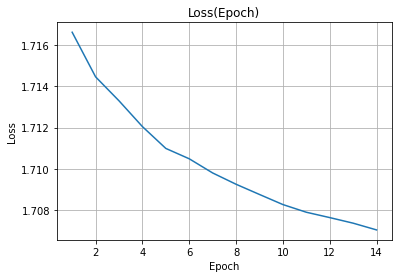

In [9]:
# Build optuna objective function.
import optuna
import sklearn 

def objective(trial):
    # Data loading
    y_min_u_bool = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_min_sparse_bool_constr.csv').drop(columns='timestamps')
    exogenous_data = pd.read_csv('..\data\processed\production\exogenous_data_extended.csv').drop(columns=['date'])
    X_min_u_bool_train, X_min_u_bool_test, y_min_u_bool_train, y_min_u_bool_test, scaler = utils.split_and_suffle(exogenous_data, y_min_u_bool[utils.cols_with_positive_values(y_min_u_bool)], test_size=0.2, scaling=True)
    data = {'X_train':X_min_u_bool_train.astype(float),
            'X_test': X_min_u_bool_test.astype(float),
            'y_train':y_min_u_bool_train.astype(float),
            'y_test': y_min_u_bool_test.astype(float)
        }
    # Dataset object creation
    _dataset = myai.ThesisDataset(data)
    hyper_params = {
        'input_size': _dataset.X.shape[1],
        'hidden_size': trial.suggest_int('hidden_size', 1, 100),
        'output_size': _dataset.y.shape[1],
        'n_layers': trial.suggest_int('n_layers', 1, 3),
        'dropout': trial.suggest_float('dropout', 0.0, 0.5),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid']),
        'optimizer': trial.suggest_categorical('optimizer', ['adam', 'sgd']),
        'lr': trial.suggest_float('lr', 1e-5, 1e-1, log=True),
        'epochs': trial.suggest_int('epochs', 1, 100),
        'batch_size': trial.suggest_categorical('batch_size', [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]),
        'classifier': True
        }
    model = myai.Context(myai.MultilayerPerceptronStrategy(hyper_params))
    model.fit(data)
    prediction = model.predict(data)
    prediction = pd.DataFrame(prediction, columns=utils.cols_with_positive_values(y_min_u_bool))
    f1_score = sklearn.metrics.f1_score(data['y_test'], prediction, average='micro')
    return f1_score
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=num_trials)
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
# Write the results to a csv file.
with open("./hyper_params_results/params_mlp_sparse_classifier_min_u.csv", "w") as f:
    f.write("params,value\n")
    for key, value in trial.params.items():
        f.write("{},{}\n".format(key, value))
    f.write("classifier,True\n")
    f.write("value,{}\n".format(trial.value))

## MLP: Balanced Classification Dataset

[I 2022-09-24 23:01:25,094] A new study created in memory with name: no-name-3befb0b8-3019-42d2-89c9-4a34032435e0
[I 2022-09-24 23:02:23,379] Trial 0 finished with value: 0.5285051887833959 and parameters: {'hidden_size': 62, 'n_layers': 2, 'dropout': 0.3852207084974009, 'activation': 'sigmoid', 'optimizer': 'adam', 'lr': 0.0002627219799217547, 'epochs': 65, 'batch_size': 256}. Best is trial 0 with value: 0.5285051887833959.


Number of finished trials:  1
Best trial:
  Value: 0.5285051887833959
  Params: 
    hidden_size: 62
    n_layers: 2
    dropout: 0.3852207084974009
    activation: sigmoid
    optimizer: adam
    lr: 0.0002627219799217547
    epochs: 65
    batch_size: 256


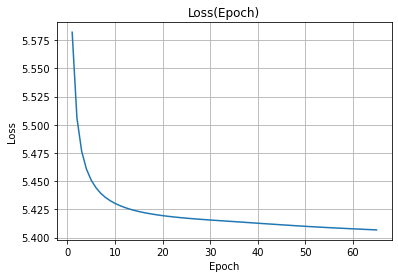

In [10]:
# Build optuna objective function.
import optuna
import sklearn 

def objective(trial):
    # Data loading
    y_min_u_bool = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_min_balanced_bool_constr.csv')
    exogenous_data = pd.read_csv('..\data\ground_truth\\exogenous_data_vm_pu_min_balanced.csv').drop(columns=['date'])
    X_max_u_bool_train, X_max_u_bool_test, y_max_u_bool_train, y_max_u_bool_test, scaler = utils.split_and_suffle(exogenous_data, y_min_u_bool[utils.cols_with_positive_values(y_min_u_bool)], test_size=0.2, scaling=True)
    data = {'X_train':X_max_u_bool_train.astype(float),
            'X_test': X_max_u_bool_test.astype(float),
            'y_train':y_max_u_bool_train.astype(float),
            'y_test': y_max_u_bool_test.astype(float)
        }
    # Dataset object creation
    _dataset = myai.ThesisDataset(data)
    hyper_params = {
        'input_size': _dataset.X.shape[1],
        'hidden_size': trial.suggest_int('hidden_size', 1, 100),
        'output_size': _dataset.y.shape[1],
        'n_layers': trial.suggest_int('n_layers', 1, 3),
        'dropout': trial.suggest_float('dropout', 0.0, 0.5),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid']),
        'optimizer': trial.suggest_categorical('optimizer', ['adam', 'sgd']),
        'lr': trial.suggest_float('lr', 1e-5, 1e-1, log=True),
        'epochs': trial.suggest_int('epochs', 1, 100),
        'batch_size': trial.suggest_categorical('batch_size', [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]),
        'classifier': True
        }
    model = myai.Context(myai.MultilayerPerceptronStrategy(hyper_params))
    model.fit(data)
    prediction = model.predict(data)
    prediction = pd.DataFrame(prediction, columns=utils.cols_with_positive_values(y_min_u_bool))
    f1_score = sklearn.metrics.f1_score(data['y_test'], prediction, average='micro')
    return f1_score
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=num_trials)
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
# Write the results to a csv file.
with open("./hyper_params_results/params_mlp_balanced_classifier_min_u.csv", "w") as f:
    f.write("params,value\n")
    for key, value in trial.params.items():
        f.write("{},{}\n".format(key, value))
    f.write("classifier,True\n")
    f.write("value,{}\n".format(trial.value))

## MLP: Regression Sparse Dataset

[I 2022-09-24 23:02:23,948] A new study created in memory with name: no-name-d76f92f2-4bef-49e8-83a3-3401e9de1bec
[I 2022-09-24 23:02:58,935] Trial 0 finished with value: 0.18105667803993084 and parameters: {'hidden_size': 2, 'n_layers': 1, 'dropout': 0.487994829951564, 'activation': 'tanh', 'optimizer': 'sgd', 'lr': 7.229589977448285e-05, 'epochs': 6, 'batch_size': 512}. Best is trial 0 with value: 0.18105667803993084.


Number of finished trials:  1
Best trial:
  Value: 0.18105667803993084
  Params: 
    hidden_size: 2
    n_layers: 1
    dropout: 0.487994829951564
    activation: tanh
    optimizer: sgd
    lr: 7.229589977448285e-05
    epochs: 6
    batch_size: 512


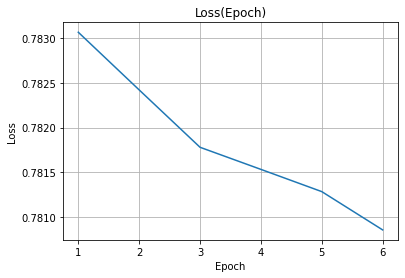

In [11]:
# Build optuna objective function.
import optuna
import sklearn 

def objective(trial):
    # Data loading
    y_min_u = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_min_constr.csv').drop(columns='timestamps')
    exogenous_data = pd.read_csv('..\data\processed\production\exogenous_data_extended.csv').drop(columns=['date'])
    X_min_u_train, X_min_u_test, y_min_u_train, y_min_u_test, scaler = utils.split_and_suffle(exogenous_data, y_min_u, test_size=0.2, scaling=True)
    data = {'X_train':X_min_u_train.astype(float),
            'X_test': X_min_u_test.astype(float),
            'y_train':y_min_u_train.astype(float),
            'y_test': y_min_u_test.astype(float)
        }
    # Dataset object creation
    _dataset = myai.ThesisDataset(data)
    hyper_params = {
        'input_size': _dataset.X.shape[1],
        'hidden_size': trial.suggest_int('hidden_size', 1, 100),
        'output_size': _dataset.y.shape[1],
        'n_layers': trial.suggest_int('n_layers', 1, 3),
        'dropout': trial.suggest_float('dropout', 0.0, 0.5),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid']),
        'optimizer': trial.suggest_categorical('optimizer', ['adam', 'sgd']),
        'lr': trial.suggest_float('lr', 1e-5, 1e-1, log=True),
        'epochs': trial.suggest_int('epochs', 1, 100),
        'batch_size': trial.suggest_categorical('batch_size', [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]),
        'classifier': False
        }
    model = myai.Context(myai.MultilayerPerceptronStrategy(hyper_params))
    model.fit(data)
    prediction = model.predict(data)
    prediction = pd.DataFrame(prediction, columns=y_min_u.columns)
    y_min_u_train = pd.DataFrame(y_min_u_train, columns=y_min_u.columns)
    # evaluate the regression performance with my metrics
    threshold = data['y_test'].loc[:, data['y_test'].max(axis=0) != 0].max(axis=0).mean() * 0.1 
    metric = metrics.Metrics()
    metric.get_prediction_scores(prediction, data['y_test'], threshold=threshold)
    return metric.hybrid_f1
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=num_trials)
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
# Write the results to a csv file.
with open("./hyper_params_results/params_mlp_regression_min_u.csv", "w") as f:
    f.write("params,value\n")
    for key, value in trial.params.items():
        f.write("{},{}\n".format(key, value))
    f.write("classifier,False\n")
    f.write("value,{}\n".format(trial.value))

## MLP: Regression Focused Dataset

[I 2022-09-24 23:02:59,245] A new study created in memory with name: no-name-38605289-62bb-4f32-a47a-94b3c2dbba28
[I 2022-09-24 23:03:02,554] Trial 0 finished with value: 0.47785879344984616 and parameters: {'hidden_size': 55, 'n_layers': 1, 'dropout': 0.028872790513542523, 'activation': 'sigmoid', 'optimizer': 'adam', 'lr': 1.1693701954864931e-05, 'epochs': 7, 'batch_size': 8}. Best is trial 0 with value: 0.47785879344984616.


Number of finished trials:  1
Best trial:
  Value: 0.47785879344984616
  Params: 
    hidden_size: 55
    n_layers: 1
    dropout: 0.028872790513542523
    activation: sigmoid
    optimizer: adam
    lr: 1.1693701954864931e-05
    epochs: 7
    batch_size: 8


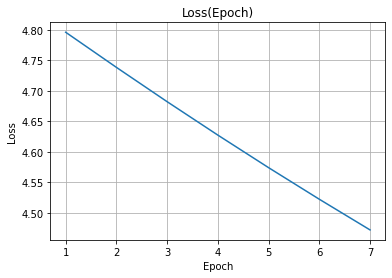

In [12]:
# Build optuna objective function.
import optuna
import sklearn 

def objective(trial):
    # Data loading
    y_min_u = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_min_focused_constr.csv')
    exogenous_data = pd.read_csv('..\data\ground_truth\\exogenous_data_vm_pu_min_focused.csv').drop(columns=['date'])
    X_min_u_train, X_min_u_test, y_min_u_train, y_min_u_test, scaler = utils.split_and_suffle(exogenous_data, y_min_u, scaling=True)
    data = {'X_train':X_min_u_train.astype(float),
            'X_test': X_min_u_test.astype(float),
            'y_train':y_min_u_train.astype(float),
            'y_test': y_min_u_test.astype(float)
        }
    # Dataset object creation
    _dataset = myai.ThesisDataset(data)
    hyper_params = {
        'input_size': _dataset.X.shape[1],
        'hidden_size': trial.suggest_int('hidden_size', 1, 100),
        'output_size': _dataset.y.shape[1],
        'n_layers': trial.suggest_int('n_layers', 1, 3),
        'dropout': trial.suggest_float('dropout', 0.0, 0.5),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid']),
        'optimizer': trial.suggest_categorical('optimizer', ['adam', 'sgd']),
        'lr': trial.suggest_float('lr', 1e-5, 1e-1, log=True),
        'epochs': trial.suggest_int('epochs', 1, 100),
        'batch_size': trial.suggest_categorical('batch_size', [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]),
        'classifier': False
        }
    model = myai.Context(myai.MultilayerPerceptronStrategy(hyper_params))
    model.fit(data)
    # print(model.strategy.model.eval())
    prediction = model.predict(data)
    prediction = pd.DataFrame(prediction, columns=y_min_u.columns)
    # print('bus_16 prediction: ', prediction['bus_16'])
    y_min_u_train = pd.DataFrame(y_min_u_train, columns=y_min_u.columns)
    # evaluate the regression performance with my metrics
    threshold = y_min_u_train.loc[:, y_min_u_train.max(axis=0) != 0].max(axis=0).mean() * 0.1 
    # print('threshold: ', threshold)
    metric = metrics.Metrics()
    data['y_test'] = pd.DataFrame(data['y_test'], columns=y_min_u.columns)
    # evaluate the regression performance with my metrics
    return mean_squared_error(data['y_test'], prediction, squared=False)
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=num_trials)
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
# Write the results to a csv file.
with open("./hyper_params_results/params_mlp_regression_focused_min_u.csv", "w") as f:
    f.write("params,value\n")
    for key, value in trial.params.items():
        f.write("{},{}\n".format(key, value))
    f.write("classifier,False\n")
    f.write("value,{}\n".format(trial.value))

## Regression Filtered Dataset

[I 2022-09-24 23:03:02,868] A new study created in memory with name: no-name-fbd2dec4-f937-4db2-b7cd-4b35759de330
[I 2022-09-24 23:05:45,852] Trial 0 finished with value: 0.9562433249361378 and parameters: {'hidden_size': 63, 'n_layers': 3, 'dropout': 0.0013619804919678402, 'activation': 'tanh', 'optimizer': 'adam', 'lr': 0.05103588011128337, 'epochs': 32, 'batch_size': 256}. Best is trial 0 with value: 0.9562433249361378.


Number of finished trials:  1
Best trial:
  Value: 0.9562433249361378
  Params: 
    hidden_size: 63
    n_layers: 3
    dropout: 0.0013619804919678402
    activation: tanh
    optimizer: adam
    lr: 0.05103588011128337
    epochs: 32
    batch_size: 256


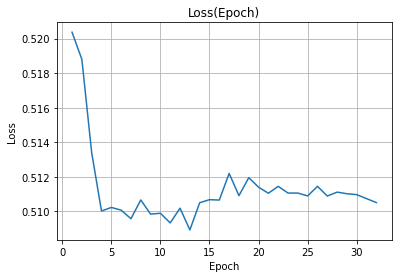

In [13]:
# Build optuna objective function.
import optuna
import sklearn 

def objective(trial):
    # Data loading
    y_min_u = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_min_constr.csv').drop(columns='timestamps')
    exogenous_data = pd.read_csv('..\data\processed\production\exogenous_data_extended.csv').drop(columns=['date'])
    X_min_u_train, X_min_u_test, y_min_u_train, y_min_u_test, scaler = utils.split_and_suffle(exogenous_data, y_min_u[utils.cols_with_positive_values(y_min_u)], test_size=0.2, scaling=True)
    data = {'X_train':X_min_u_train.astype(float),
            'X_test': X_min_u_test.astype(float),
            'y_train':y_min_u_train.astype(float),
            'y_test': y_min_u_test.astype(float)
        }
    # Dataset object creation
    _dataset = myai.ThesisDataset(data)
    hyper_params = {
        'input_size': _dataset.X.shape[1],
        'hidden_size': trial.suggest_int('hidden_size', 1, 100),
        'output_size': _dataset.y.shape[1],
        'n_layers': trial.suggest_int('n_layers', 1, 3),
        'dropout': trial.suggest_float('dropout', 0.0, 0.5),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid']),
        'optimizer': trial.suggest_categorical('optimizer', ['adam', 'sgd']),
        'lr': trial.suggest_float('lr', 1e-5, 1e-1, log=True),
        'epochs': trial.suggest_int('epochs', 1, 100),
        'batch_size': trial.suggest_categorical('batch_size', [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]),
        'classifier': False
        }
    model = myai.Context(myai.MultilayerPerceptronStrategy(hyper_params))
    model.fit(data)
    prediction = model.predict(data)
    prediction = pd.DataFrame(prediction, columns=utils.cols_with_positive_values(y_min_u))
    y_min_u_train = pd.DataFrame(y_min_u_train, columns=utils.cols_with_positive_values(y_min_u))
    # evaluate the regression performance with my metrics
    threshold = data['y_test'].loc[:, data['y_test'].max(axis=0) != 0].max(axis=0).mean() * 0.1 
    metric = metrics.Metrics()
    metric.get_prediction_scores(prediction, data['y_test'], threshold=threshold)
    return metric.hybrid_f1
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=num_trials)
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
# Write the results to a csv file.
with open("./hyper_params_results/params_mlp_regression_filtered_min_u.csv", "w") as f:
    f.write("params,value\n")
    for key, value in trial.params.items():
        f.write("{},{}\n".format(key, value))
    f.write("classifier,False\n")
    f.write("value,{}\n".format(trial.value))